In [1]:
import numpy as np
from scipy.linalg import expm
from scipy.special import factorial
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [2]:
n = 2
A = np.random.randn(n, n)
B = np.random.randn(n,)
tau = 0.1

In [3]:
Af = np.zeros((2 * n, 2 * n))
Af[n:, n:] = A
Af[:n, :n] = -np.eye(n) / tau
Af[:n, n:] = np.eye(n) / tau

Bf = np.concatenate((np.zeros(n), B))
Cf = np.zeros((n, 2 * n))
Cf[:n, :n] = np.eye(n)

Af, Bf, Cf

(array([[-10.    ,  -0.    ,  10.    ,   0.    ],
        [ -0.    , -10.    ,   0.    ,  10.    ],
        [  0.    ,   0.    ,  -0.2885,   0.7422],
        [  0.    ,   0.    ,  -0.7707,  -1.3561]]),
 array([ 0.    ,  0.    ,  0.8202, -1.252 ]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.]]))

In [4]:
Ag = np.zeros((2 * n, 2 * n))
Ag[n:, n:] = A

Bg = Bf

Cg = np.zeros((n, 2 * n))
Cg[:n, n:] = np.eye(n)

Ag, Bg, Cg

(array([[ 0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    , -0.2885,  0.7422],
        [ 0.    ,  0.    , -0.7707, -1.3561]]),
 array([ 0.    ,  0.    ,  0.8202, -1.252 ]),
 array([[0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [5]:
Ap = tau * A + np.eye(A.shape[0])
Bp = tau * B

In [6]:
dt = 1e-3
ts = np.arange(0, 1, 1e-3)
xs = np.array([Cg @ expm(Ag * t) @ Bg for t in ts])

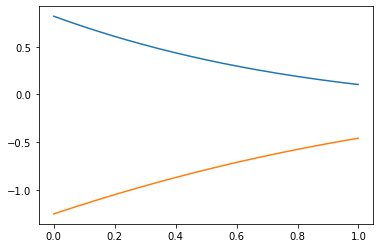

In [7]:
fig, ax = plt.subplots()
ax.plot(ts, xs)

In [8]:
dt = 1e-3
ts = np.arange(0, 1, 1e-3)
xs_f = np.array([Cf @ expm(Af * t) @ Bf for t in ts])

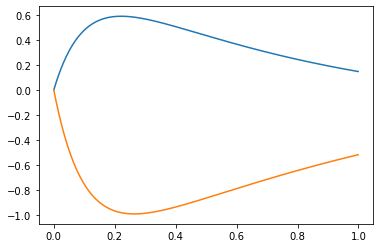

In [9]:
fig, ax = plt.subplots()
ax.plot(ts, xs_f)

In [10]:
#ys = np.array([Bp * (np.exp(-t / tau) / tau) + Ap @ Cf @ expm(Af * t) @ Bf for t in ts])
ys = np.array([Ap @ Cf @ expm(Af * t) @ Bf for t in ts])

In [11]:
ys_diff = np.array([Cg @ expm(Ag * t) @ Bg - Ap @ Cf @ expm(Af * t) @ Bf for t in ts])

In [12]:
ys_diff = np.array([(Cg @ expm(Ag * t) - Ap @ Cf @ expm(Af * t)) @ Bg for t in ts])

In [13]:
ys_diff = np.array([(Cg @ expm(Ag * t) - Ap @ Cf @ expm(Af * t)) @ Bg for t in ts])

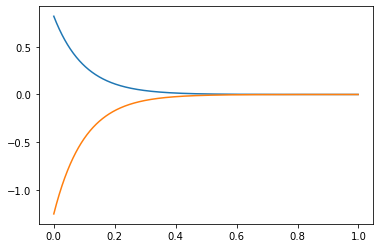

In [14]:
fig, ax = plt.subplots()
ax.plot(ts, ys_diff)

In [15]:
t = 0.2
(Cg @ expm(Ag * t) - Ap @ Cf @ expm(Af * t)) @ Bf

array([ 0.111 , -0.1694])

In [16]:
expm(-np.eye(2) * t / tau) @ B

array([ 0.111 , -0.1694])

In [17]:
Cg @ expm(Ag * t) @ Bg, Ap @ Cf @ expm(Af * t) @ Bf

(array([ 0.6086, -1.0499]), array([ 0.4976, -0.8805]))

In [21]:
Cg @ expm(Ag * t) @ Bg, Ap @ Cf @ expm(Af * t) @ Bf

(array([ 0.6086, -1.0499]), array([ 0.4976, -0.8805]))

In [22]:
T = np.zeros((2 * n, 2 * n))
#T[:n, :n] = Ap
#T[n:, n:] = np.eye(n)
T[n:, :n] = Ap
T[:n, n:] = np.eye(n)
TI = np.linalg.inv(T)

T, TI

(array([[ 0.    ,  0.    ,  1.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  1.    ],
        [ 0.9712,  0.0742,  0.    ,  0.    ],
        [-0.0771,  0.8644,  0.    ,  0.    ]]),
 array([[ 0.    ,  0.    ,  1.0227, -0.0878],
        [ 0.    ,  0.    ,  0.0912,  1.1491],
        [ 1.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  1.    ,  0.    ,  0.    ]]))

In [23]:
Cg @ expm(Ag * t) @ Bf, Cg @ expm(T @ Af @ TI * t) @ T @ Bf

(array([ 0.6086, -1.0499]), array([ 0.4976, -0.8805]))

In [54]:
Cg @ (expm(Ag * t) @ Bf - expm(T @ Af @ TI * t) @ T @ Bf)

array([ 0.111 , -0.1694])

In [100]:
expm(-(np.eye(n) / tau) * t) @ B

array([ 0.111 , -0.1694])

In [110]:
np.linalg.matrix_power(Ag * t, 4) @ Bf, np.linalg.matrix_power(T @ Af @ TI * t, 4) @ T @ Bf

(array([0.    , 0.    , 0.0002, 0.0012]),
 array([  0.0002,   0.0012, -13.1227,  20.0326]))

In [86]:
expm(Ag * t)

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.9339,  0.1257],
       [ 0.    ,  0.    , -0.1305,  0.7531]])

In [89]:
Cg @ expm(T @ Af @ TI * t) @ T @ Bf

array([ 0.4976, -0.8805])

In [25]:
Cg, T @ Af @ TI

(array([[0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[ -0.2885,   0.7422,   0.    ,   0.    ],
        [ -0.7707,  -1.3561,   0.    ,   0.    ],
        [  9.7115,   0.7422, -10.    ,   0.    ],
        [ -0.7707,   8.6439,   0.    , -10.    ]]))

In [38]:
Bf2 = T @ Bf + np.concatenate((np.zeros(n), B))

In [43]:
Bf, Bf2

(array([ 0.    ,  0.    ,  0.8202, -1.252 ]),
 array([ 0.8202, -1.252 ,  0.8202, -1.252 ]))

In [51]:
Cg @ expm(Ag * t) @ Bf, Cg @ expm(T @ Af @ TI * t) @ Bf2

(array([ 0.6086, -1.0499]), array([ 0.6086, -1.0499]))

In [52]:
Ag

array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -0.2885,  0.7422],
       [ 0.    ,  0.    , -0.7707, -1.3561]])

In [53]:
T @ Af @ TI

array([[ -0.2885,   0.7422,   0.    ,   0.    ],
       [ -0.7707,  -1.3561,   0.    ,   0.    ],
       [  9.7115,   0.7422, -10.    ,   0.    ],
       [ -0.7707,   8.6439,   0.    , -10.    ]])

In [188]:
for k in range(100):
    print(1.0 / factorial(k) * np.linalg.matrix_power(Ag, k))
    print(1.0 / factorial(k) * np.linalg.matrix_power(T @ Af @ TI, k))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      1.1944  1.0467]
 [ 0.      0.     -0.8473  0.5359]]
[[-10.       0.      11.1944   1.0467]
 [  0.     -10.      -0.8473  10.5359]
 [  0.       0.       1.1944   1.0467]
 [  0.       0.      -0.8473   0.5359]]
[[ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.2698  0.9056]
 [ 0.      0.     -0.7331 -0.2998]]
[[ 50.      -0.     -49.7302   0.9056]
 [ -0.      50.      -0.7331 -50.2998]
 [  0.       0.       0.2698   0.9056]
 [  0.       0.      -0.7331  -0.2998]]
[[ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.     -0.1483  0.2559]
 [ 0.      0.     -0.2072 -0.3093]]
[[-166.6667    0.      166.5183    0.2559]
 [   0.     -166.6667   -0.2072  166.3573]
 [   0.        0.       -0.1483    0.2559]
 [   0.     

In [35]:
(Cg - Ap @ Cf) @ R @ Bf

array([-0.5915, -1.9501])